# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

# `ALEJANDRO SÁNCHEZ MOZNÓN`

**15/01/2024**

## Aplicar un caso de uso (*Clasificación*)

In [1]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

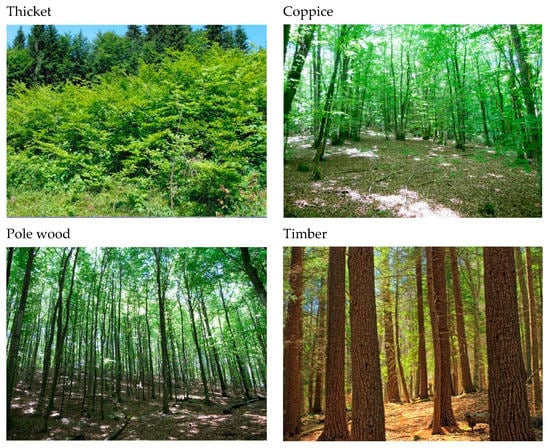

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [3]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [4]:
dataset_cub[0:100000]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100.0,52.0,16.0,376.0,50.0,3816.0,227.0,203.0,105.0,4295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99996,3090.0,50.0,16.0,361.0,40.0,3840.0,225.0,202.0,106.0,4268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,3083.0,45.0,18.0,335.0,33.0,3864.0,222.0,198.0,104.0,4241.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,3077.0,41.0,15.0,309.0,43.0,3889.0,221.0,205.0,116.0,4214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [5]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [6]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

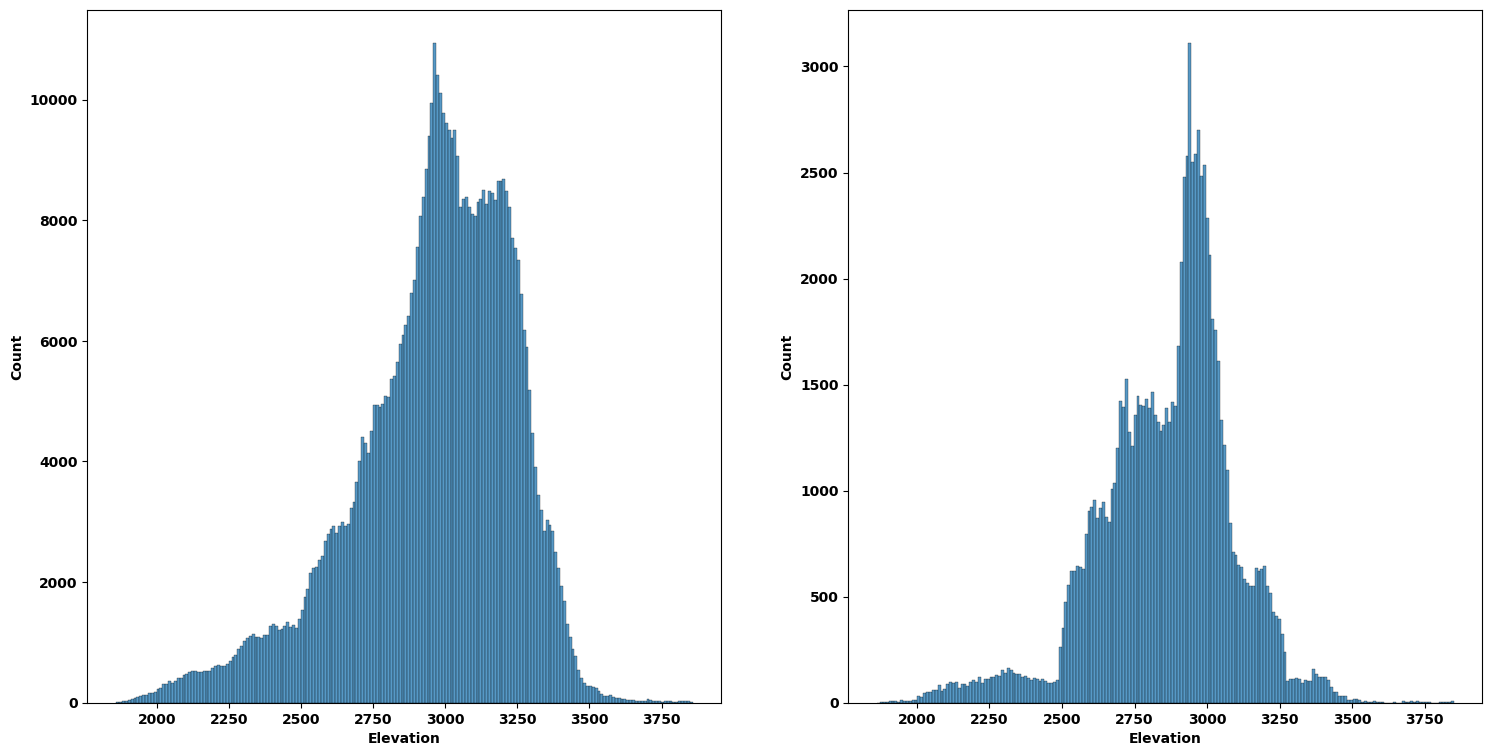

In [7]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que **la variable analizada no tiene la misma representación en el subconjunto** de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [8]:
100000/len(dataset_cub)

0.17211348474730298

In [9]:
df_cub = dataset_cub.sample(frac=0.17211348474730298, random_state=222).reset_index(drop=True)
df_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [10]:
# Consultamos las principales estadísticas de la variable analizada anteriormente
display(dataset_cub['Elevation'].describe()[['count', 'mean', 'std']])
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

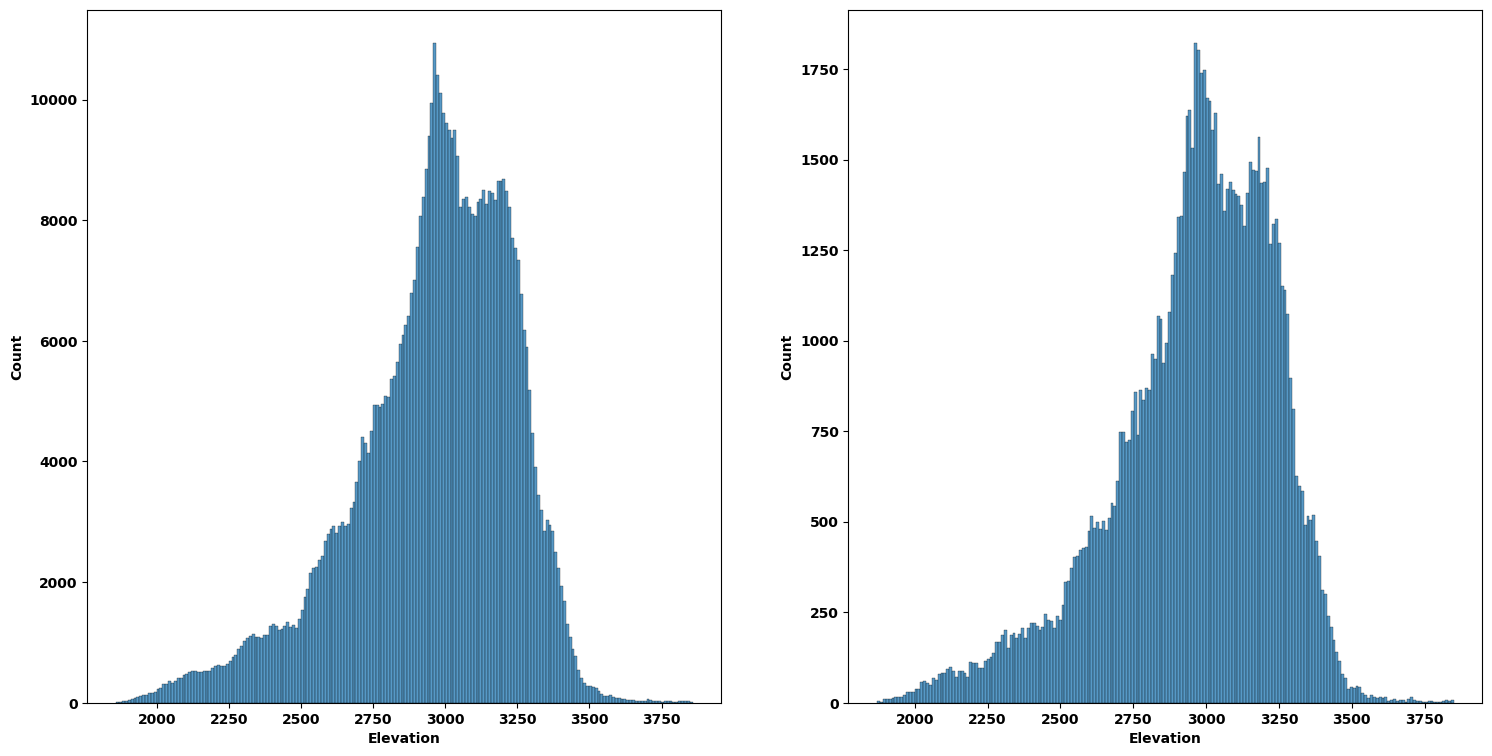

In [11]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

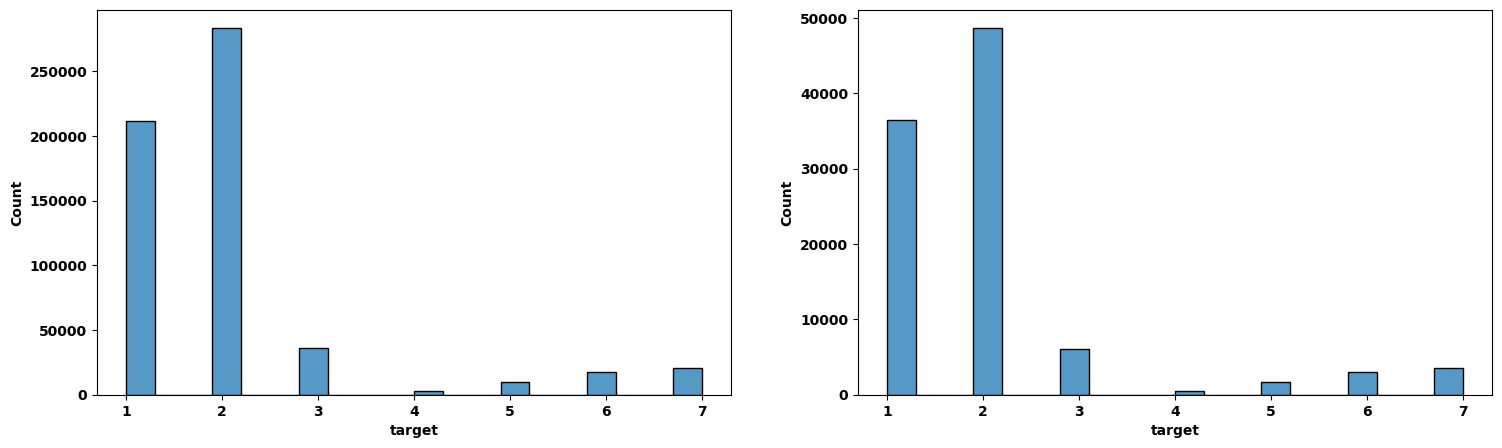

In [12]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [13]:
df_cub.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2959.010060,155.927130,14.078440,268.415310,45.890660,2356.444880,212.226180,223.392060,142.541110,1984.702670,...,0.091120,0.078660,0.003050,0.003510,0.000190,0.000510,0.026360,0.023650,0.014600,2.05919
std,279.864034,111.880189,7.466349,212.389266,57.923415,1559.881883,26.567206,19.768911,38.116316,1328.355754,...,0.287781,0.269209,0.055143,0.059141,0.013783,0.022578,0.160204,0.151957,0.119946,1.40864
min,1871.000000,0.000000,0.000000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2810.000000,59.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,119.000000,1022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2995.000000,127.000000,13.000000,218.000000,29.000000,2005.000000,218.000000,226.000000,143.000000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
75%,3163.000000,261.000000,18.000000,384.000000,68.000000,3336.000000,231.000000,237.000000,168.000000,2553.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
max,3849.000000,360.000000,66.000000,1390.000000,592.000000,7117.000000,254.000000,254.000000,253.000000,7168.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000


In [14]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [15]:
# Conteo de valores perdidos/faltantes
df_cub.isna().sum().sum()

0

In [16]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target


### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

target = 'target'
features =[x for x in df_cub.columns if x!=target]

arbol_importancia_cub = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

arbol_importancia_cub.fit(X=df_cub[features], y=df_cub[target])
y_pred_arbol_cub = arbol_importancia_cub.predict(X=df_cub[features])

print('Mean Absolute Error:', mean_absolute_error(df_cub[target], y_pred_arbol_cub))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_cub[target], y_pred_arbol_cub)*100)
print('Mean Squared Error:', mean_squared_error(df_cub[target], y_pred_arbol_cub))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_cub[target], y_pred_arbol_cub)))
print('R^2 coefficient of determination:', r2_score(df_cub[target], y_pred_arbol_cub))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


> Hemos creado, a propósito, un modelo perfecto.

In [18]:
importancia_cub = pd.DataFrame(data=arbol_importancia_cub.feature_importances_, index=features, columns=["Importancia"])

importancia_cub.sort_values(by=importancia_cub.columns[0], ascending=False, inplace=True)

In [19]:
importancia_cub["imp_acum"] = importancia_cub["Importancia"].cumsum()

In [20]:
features_cub = importancia_cub.loc[importancia_cub['imp_acum'] > 0.95].index.to_list()
print(features_cub)

['Soil_Type_39', 'Soil_Type_32', 'Soil_Type_9', 'Soil_Type_23', 'Soil_Type_22', 'Soil_Type_3', 'Soil_Type_30', 'Soil_Type_12', 'Soil_Type_10', 'Soil_Type_28', 'Soil_Type_1', 'Soil_Type_36', 'Wilderness_Area_3', 'Soil_Type_16', 'Soil_Type_5', 'Soil_Type_29', 'Soil_Type_21', 'Soil_Type_19', 'Soil_Type_4', 'Soil_Type_33', 'Soil_Type_0', 'Soil_Type_18', 'Soil_Type_2', 'Soil_Type_15', 'Soil_Type_20', 'Soil_Type_25', 'Soil_Type_13', 'Soil_Type_26', 'Soil_Type_11', 'Soil_Type_8', 'Soil_Type_27', 'Soil_Type_35', 'Soil_Type_7', 'Soil_Type_17', 'Soil_Type_14', 'Soil_Type_24', 'Soil_Type_6']


In [21]:
print("Variables iniciales: ", len(features))
print("Variables no importantes (a eliminar): ", len(features_cub))

Variables iniciales:  54
Variables no importantes (a eliminar):  37


In [22]:
df_cub_filt = df_cub.drop(features_cub, axis="columns")
df_cub_filt

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


---

### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`.
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**.

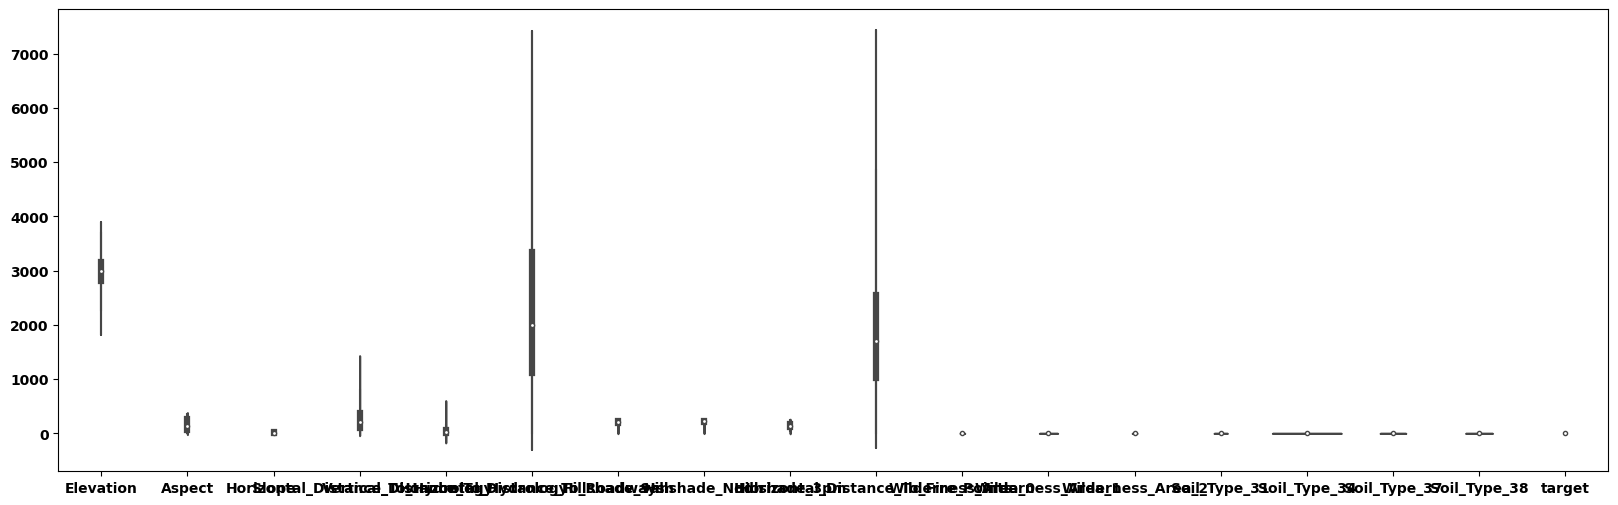

In [23]:
## Solución 18.2.1
plt.figure(figsize=(20,6))
sns.violinplot(data=df_cub_filt, orient='v')
plt.show()

> #### Explicación 18.2.1
> Observando la gráfica, podemos llegar a la conclusión de que **sí es necesario normalizar**, ya que existen variables que tienen valores muy altos en comparación con otras variables, que directamente son binarias (0 y 1). Es por esto que es un requerimiento base el llevar todos los datos a una escala para poder trabajar con ellos. 

In [24]:
## Solución 18.2.2
X = df_cub_filt.drop('target', axis='columns')
y = df_cub_filt['target']

In [25]:
from sklearn.preprocessing import MinMaxScaler

escalado_cub =MinMaxScaler().fit(X)
df_cub_normal = escalado_cub.transform(X)

df_cub_normal

array([[0.72800809, 0.00833333, 0.1969697 , ..., 0.        , 1.        ,
        0.        ],
       [0.28210313, 0.19444444, 0.43939394, ..., 0.        , 0.        ,
        0.        ],
       [0.22901921, 0.875     , 0.21212121, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.46258847, 0.40833333, 0.10606061, ..., 0.        , 0.        ,
        0.        ],
       [0.50151668, 0.1       , 0.15151515, ..., 0.        , 0.        ,
        0.        ],
       [0.55561173, 0.175     , 0.34848485, ..., 0.        , 0.        ,
        0.        ]])

In [26]:
X_normal = pd.DataFrame(df_cub_normal, columns=X.columns)
X_normal

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38
0,0.728008,0.008333,0.196970,0.396403,0.357143,0.390614,0.795276,0.846457,0.588933,0.309710,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.282103,0.194444,0.439394,0.068345,0.240741,0.223268,0.933071,0.665354,0.169960,0.054548,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.229019,0.875000,0.212121,0.089209,0.273810,0.054939,0.716535,0.897638,0.731225,0.078125,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.550051,0.961111,0.151515,0.064748,0.243386,0.825629,0.787402,0.877953,0.640316,0.555106,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.525278,0.172222,0.227273,0.237410,0.345238,0.456091,0.909449,0.818898,0.418972,0.317383,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.524267,0.163889,0.227273,0.455396,0.575397,0.145567,0.905512,0.818898,0.422925,0.080497,0.0,0.0,1.0,0.0,0.0,0.0,0.0
99996,0.256825,0.811111,0.318182,0.068345,0.265873,0.185612,0.610236,0.905512,0.841897,0.046038,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.462588,0.408333,0.106061,0.030216,0.226190,0.303780,0.901575,0.940945,0.565217,0.219587,1.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.501517,0.100000,0.151515,0.369784,0.251323,0.385837,0.862205,0.854331,0.521739,0.495257,1.0,0.0,0.0,0.0,0.0,0.0,0.0


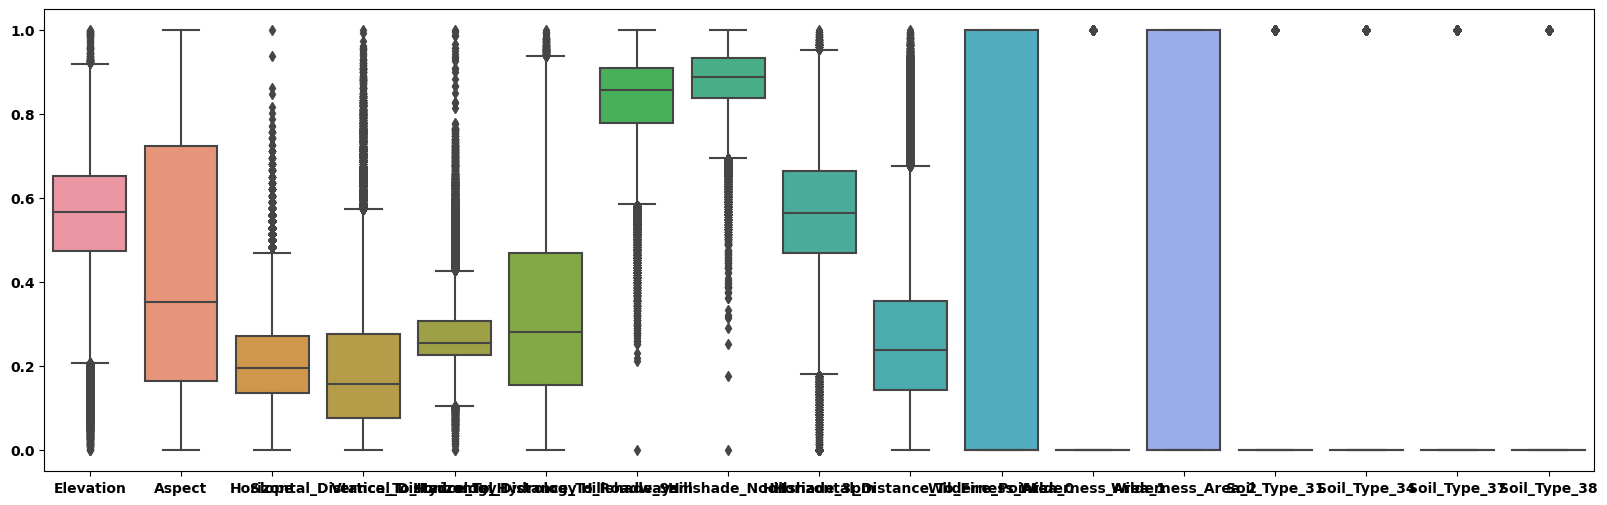

In [27]:
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

> Ahora podemos observar que los valores de todas las variables oscilan entre 0 y 1.

In [28]:
from sklearn.preprocessing import LabelEncoder

encoder_cub = LabelEncoder()
y_normal = encoder_cub.fit_transform(y)

y_normal

array([6, 2, 2, ..., 1, 1, 0], dtype=int64)

---

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**. Teniendo en cuenta las siguientes indicaciones, primero divide el datset en _training_ y en _test_ y posteriormente, entrena un modelo de **regresión logística**, calcula las siguientes métricas para evaluar este modelo y analiza su rendimiendo:
- `random_state=100`
- Guarda el `20%` de los datos para testeo.
- Calcula las proporciones de los dos conjuntos creados. 
- Número máximo de iteraciones igual a `1000`
- Métricas:
    - Accuracy
    - Confusion matrix
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size=0.2, random_state=100)


In [30]:
print("Tamaño de train:", X_train.shape[0])
print("Tamaño de test:", X_test.shape[0])

print("\n")

print("Proporción para train:", X_train.shape[0]/df_cub_normal.shape[0])
print("Proporción para test:", X_test.shape[0]/df_cub_normal.shape[0])

print("\n")

print("Suma de ambos conjuntos:", X_train.shape[0] + X_test.shape[0])
print("Tamaño del conjunto de cub:", df_cub_normal.shape[0])

Tamaño de train: 80000
Tamaño de test: 20000


Proporción para train: 0.8
Proporción para test: 0.2


Suma de ambos conjuntos: 100000
Tamaño del conjunto de cub: 100000


In [31]:
from sklearn.linear_model import LogisticRegression

log_reg_cub = LogisticRegression(max_iter=1000,
                           random_state=100)

log_reg_cub.fit(X_train, y_train)
y_pred_cub =log_reg_cub.predict(X_test)

print(y_pred_cub)

[1 0 0 ... 1 0 1]


In [32]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_cub))

Accuracy: 0.7035


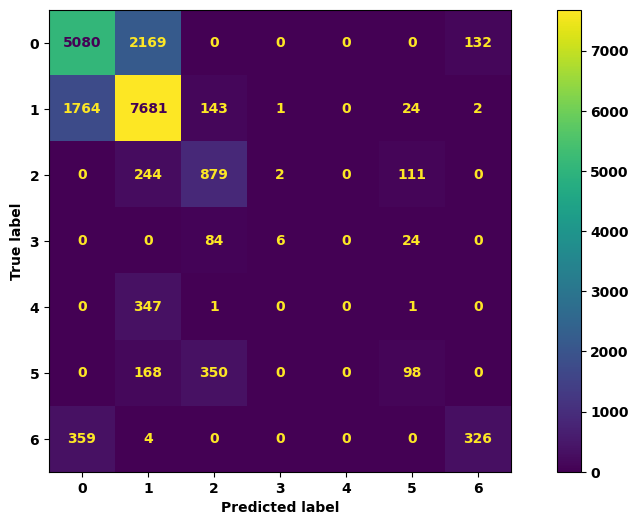

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred_cub),
                               display_labels=log_reg_cub.classes_)
disp.plot()

plt.show()

In [34]:
from sklearn.metrics import f1_score

print("f1_score:", f1_score(y_test, y_pred_cub, average="weighted"))

f1_score: 0.689557125586758


In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_cub, zero_division=0))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      7381
           1       0.72      0.80      0.76      9615
           2       0.60      0.71      0.65      1236
           3       0.67      0.05      0.10       114
           4       0.00      0.00      0.00       349
           5       0.38      0.16      0.22       616
           6       0.71      0.47      0.57       689

    accuracy                           0.70     20000
   macro avg       0.54      0.41      0.43     20000
weighted avg       0.69      0.70      0.69     20000



> #### Explicación 18.3
> Este modelo presenta unos valores para Accuracy y f1_score relativamente **normales**, en otrno a **0.7**. Una métricas que no estan mal, pero que son **ampliamente mejorables**.
>
> En relación con la matriz de confusión, podemos observar que esta bastante grande **(7x7)**, debido a la gran cantidad de respuestas que nuestro modelo puede dar como salida.
>
> Es necesario seguir haciendo pruebas con otros modelos para conocer sus rendimientos.

---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelos basados en **Gradient Boosting**:  

**`18.4.1`** Entrena un modelo tipo ***XGBoost Classifire*** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el primer modelo creado anteriormente. Consulta también, el **número** y la **profundidad máxima** de los árboles del bosque creado en este paso:
- `random_state=100`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.4.2`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curves**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros _"óptimos"_ y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con **funciones de _numpy_** para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- define con funciones de _numpy_ este rango de profundidades máximas:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.4.3`** Saca la gráfica del *Learning Curve* para estos dos modelos, definiendo y aplicando una función que tome el valor de los hiperparámetros analizados como su entrada y que dibuje la evolución del rendimiento del modelo para el conjunto de _training_ y de _test_. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [36]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
## Solución 18.4.1
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=100, n_jobs=-1)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
y_pred_xgb = xgb_classifier.predict(X_test)

In [39]:
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))

Accuracy:  0.84645


In [40]:
print("f1_score: ", f1_score(y_test, y_pred_xgb, average="weighted"))

f1_score:  0.8452923897848441


In [41]:
print(classification_report(y_test, y_pred_xgb, zero_division=0))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      7381
           1       0.84      0.88      0.86      9615
           2       0.85      0.86      0.85      1236
           3       0.85      0.82      0.84       114
           4       0.83      0.48      0.61       349
           5       0.77      0.73      0.75       616
           6       0.93      0.89      0.91       689

    accuracy                           0.85     20000
   macro avg       0.85      0.78      0.81     20000
weighted avg       0.85      0.85      0.85     20000



In [42]:
print("Número de árboles:", xgb_classifier.get_params()['n_estimators'])
print("Profundidad de los árboles:", xgb_classifier.get_params()['max_depth'])

Número de árboles: None
Profundidad de los árboles: None


> #### Explicación 18.4.1
> Este nuevo modelo presenta unas métricas algo **mejores** que el modelo anterior, en torno a **0.84**, superando por casi 0.1 puntos al modelo del ejercicio 18.3, lo que nos da a entender que **rinde mejor**. Este modelo comienza a presentar unos valores de métricas que empiezan a considerarse buenos, y poco a poco comenzamos a acercarnos al rango de valores de 0.9.

El mejor valor de n_estimators podría ser = 500 que consigue un Accuracy = 0.89625


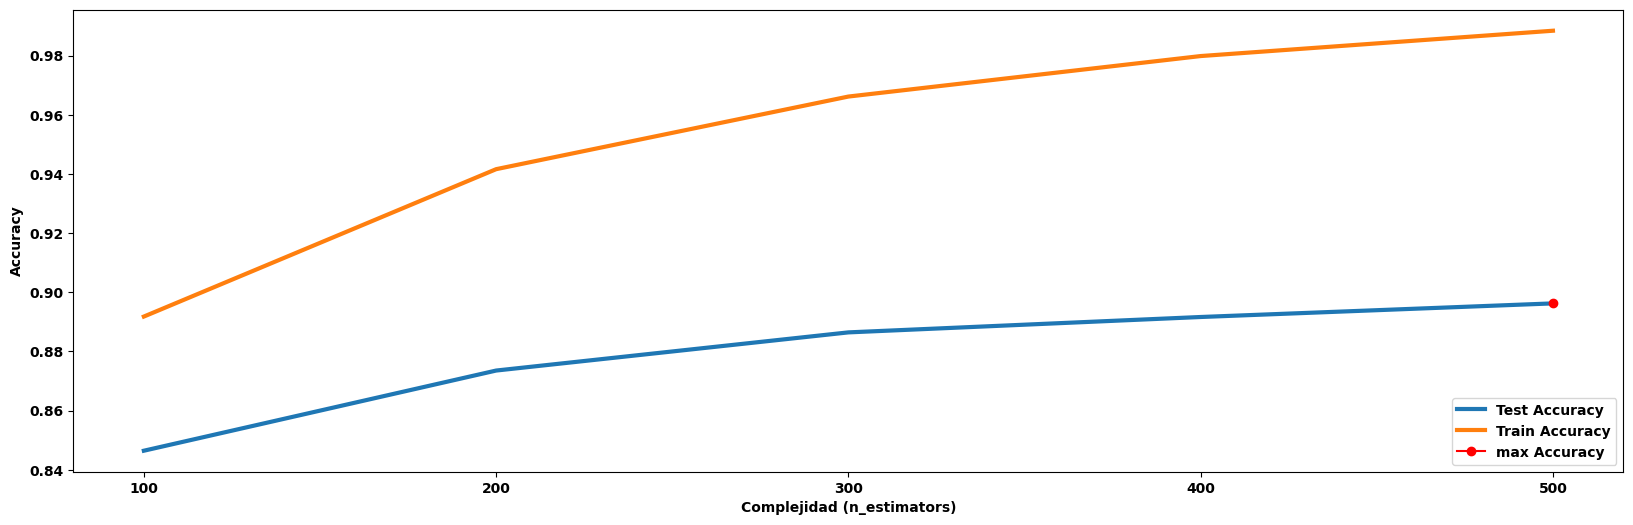

In [43]:
## Solución 18.4.2
hiper_param_n_arboles = np.arange(100, 501, 100)

train_score_n_arboles = np.zeros(hiper_param_n_arboles.size)
test_score_n_arboles = np.zeros(hiper_param_n_arboles.size)

for i in range(hiper_param_n_arboles.size):
    modelo =XGBClassifier(n_estimators=hiper_param_n_arboles[i],
                          random_state=100,
                          n_jobs=-1)
    modelo.fit(X_train, y_train)
    train_score_n_arboles[i] = accuracy_score(y_train, modelo.predict(X_train))
    test_score_n_arboles[i] = accuracy_score(y_test, modelo.predict(X_test))

print("El mejor valor de n_estimators podría ser =", hiper_param_n_arboles[np.argmax(test_score_n_arboles)],
      "que consigue un Accuracy =", max(test_score_n_arboles))

plt.figure(figsize=(20,6))
plt.plot(hiper_param_n_arboles, test_score_n_arboles, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_n_arboles, train_score_n_arboles, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_n_arboles[np.argmax(test_score_n_arboles)], max(test_score_n_arboles),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_n_arboles)
plt.xlabel('Complejidad (n_estimators)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de max_depth podría ser = 18 que consigue un Accuracy = 0.9253


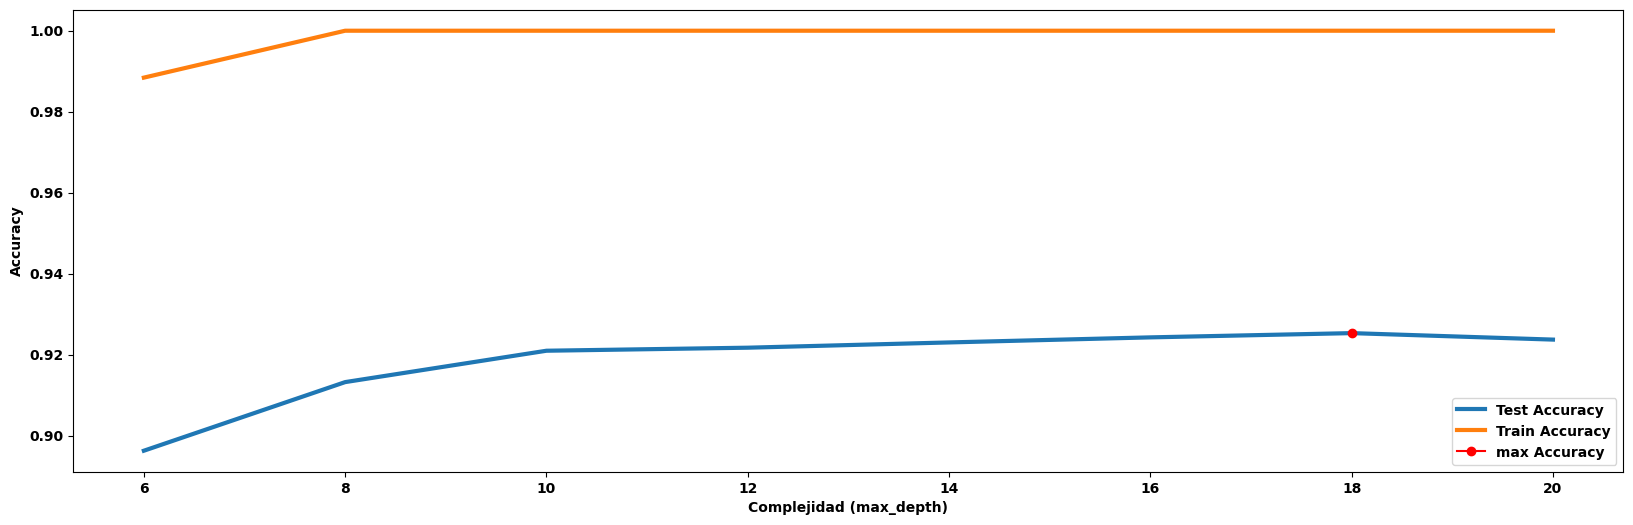

In [44]:
hiper_param_max_depth = np.arange(6, 21, 2)
n_arboles_xgb = hiper_param_n_arboles[np.argmax(test_score_n_arboles)]

train_score_max_depth = np.zeros(hiper_param_max_depth.size)
test_score_max_depth = np.zeros(hiper_param_max_depth.size)

for i in range(hiper_param_max_depth.size):
    modelo =XGBClassifier(max_depth=hiper_param_max_depth[i],
                          n_estimators=n_arboles_xgb,
                          random_state=100,
                          n_jobs=-1)
    modelo.fit(X_train, y_train)
    train_score_max_depth[i] = accuracy_score(y_train, modelo.predict(X_train))
    test_score_max_depth[i] = accuracy_score(y_test, modelo.predict(X_test))

print("El mejor valor de max_depth podría ser =", hiper_param_max_depth[np.argmax(test_score_max_depth)],
      "que consigue un Accuracy =", max(test_score_max_depth))

plt.figure(figsize=(20,6))
plt.plot(hiper_param_max_depth, test_score_max_depth, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_max_depth, train_score_max_depth, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_max_depth[np.argmax(test_score_max_depth)], max(test_score_max_depth),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_max_depth)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

El mejor valor de learning_rate podría ser = 0.3 que consigue un Accuracy = 0.9253


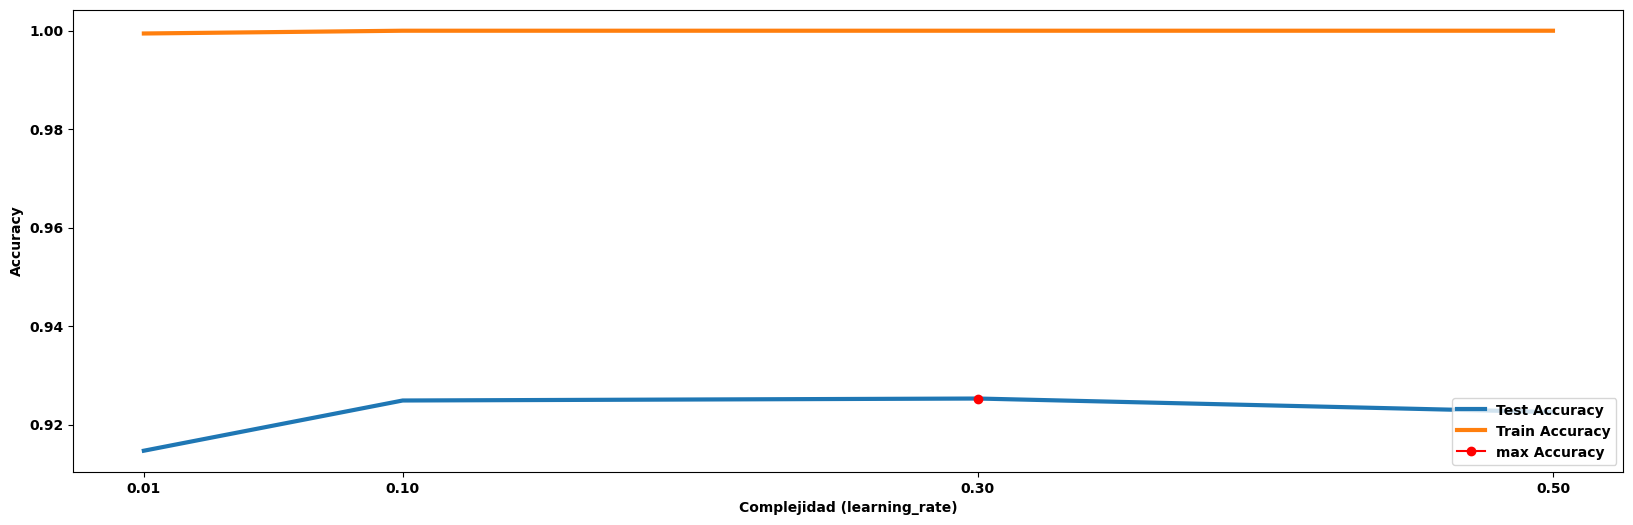

In [45]:
max_depth_xgb = hiper_param_max_depth[np.argmax(test_score_max_depth)]
n_arboles_xgb = hiper_param_n_arboles[np.argmax(test_score_n_arboles)]
hiper_param_learning_rate = [0.01, 0.1, 0.3, 0.5]

train_score_learning_rate = np.zeros(len(hiper_param_learning_rate))
test_score_learning_rate = np.zeros(len(hiper_param_learning_rate))

for i in range(len(hiper_param_learning_rate)):
    modelo =XGBClassifier(learning_rate=hiper_param_learning_rate[i],
                          max_depth=max_depth_xgb,
                          n_estimators=n_arboles_xgb,
                          random_state=100,
                          n_jobs=-1)
    modelo.fit(X_train, y_train)
    train_score_learning_rate[i] = accuracy_score(y_train, modelo.predict(X_train))
    test_score_learning_rate[i] = accuracy_score(y_test, modelo.predict(X_test))

print("El mejor valor de learning_rate podría ser =", hiper_param_learning_rate[np.argmax(test_score_learning_rate)],
      "que consigue un Accuracy =", max(test_score_learning_rate))

plt.figure(figsize=(20,6))
plt.plot(hiper_param_learning_rate, test_score_learning_rate, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param_learning_rate, train_score_learning_rate, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param_learning_rate[np.argmax(test_score_learning_rate)], max(test_score_learning_rate),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param_learning_rate)
plt.xlabel('Complejidad (learning_rate)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [46]:
learning_rate_xgb = hiper_param_learning_rate[np.argmax(test_score_learning_rate)]

modelo_optimo_xgb = XGBClassifier(
    n_jobs=-1,
    random_state=100,
    max_depth=max_depth_xgb,
    n_estimators=n_arboles_xgb,
    learning_rate=learning_rate_xgb
)

modelo_optimo_xgb.fit(X_train, y_train)

y_pred_xgb_optimo = modelo_optimo_xgb.predict(X_test)

In [47]:
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb_optimo))

Accuracy:  0.9253


In [48]:
print("f1_score: ", f1_score(y_test, y_pred_xgb_optimo, average="weighted"))

f1_score:  0.9249326498856001


In [49]:
print(classification_report(y_test, y_pred_xgb_optimo, zero_division=0))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      7381
           1       0.92      0.95      0.94      9615
           2       0.90      0.90      0.90      1236
           3       0.84      0.81      0.82       114
           4       0.85      0.69      0.76       349
           5       0.85      0.83      0.84       616
           6       0.95      0.93      0.94       689

    accuracy                           0.93     20000
   macro avg       0.89      0.86      0.88     20000
weighted avg       0.93      0.93      0.92     20000



> #### Explicación 18.4.2
> Las métricas de este nuevo modelo **superan con creces** la de **los dos anteriores**, y es que, como veniamos comentando, ya estamos por encima de valores como 0.9 (concretamente **0.92**), esto es debido, en gran parte, por esa búsqueda de **valores óptimos**, que son, para este modelo, los que estaban mostrando valores de accuracy más altos.

In [50]:
## Solución 18.4.3
def curva_aprendizaje_xgb(n_arboles, max_depth, learning_rate):
    modelo_arbol = XGBClassifier(random_state=100, n_jobs=-1, n_estimators=n_arboles, max_depth=max_depth, learning_rate=learning_rate)

    num_samples = np.linspace(1000, X_train.shape[0], 10).astype(int)

    train_score = np.zeros(num_samples.size)
    test_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]]))
        test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.xticks(num_samples)
    plt.title('Curva de aprendizaje (Learning Curve) para el modelo XGB')
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()


La diferencia final del rendimiento del modelo entre training y test es=  0.04535


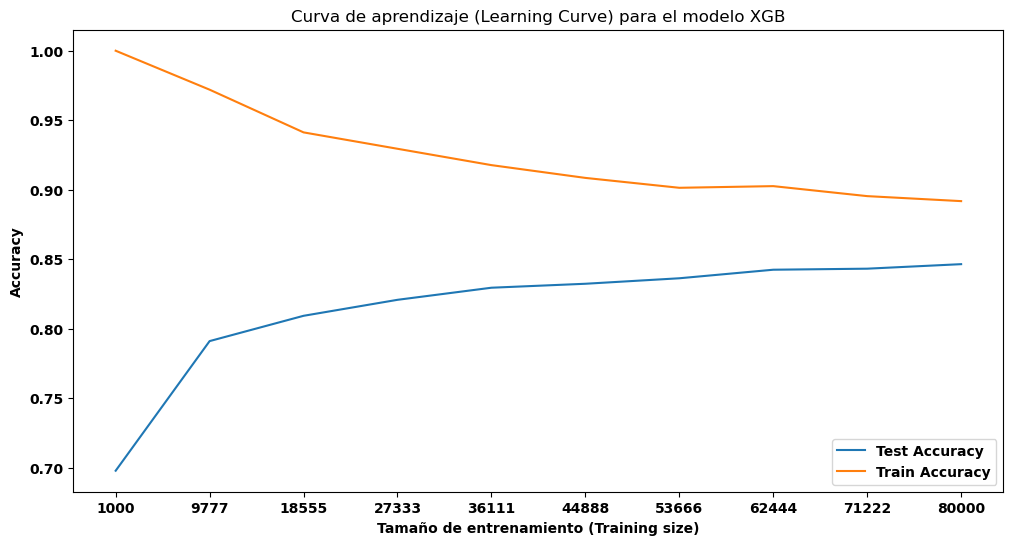

In [51]:
curva_aprendizaje_xgb(xgb_classifier.n_estimators, xgb_classifier.max_depth, xgb_classifier.learning_rate)

La diferencia final del rendimiento del modelo entre training y test es=  0.07469999999999999


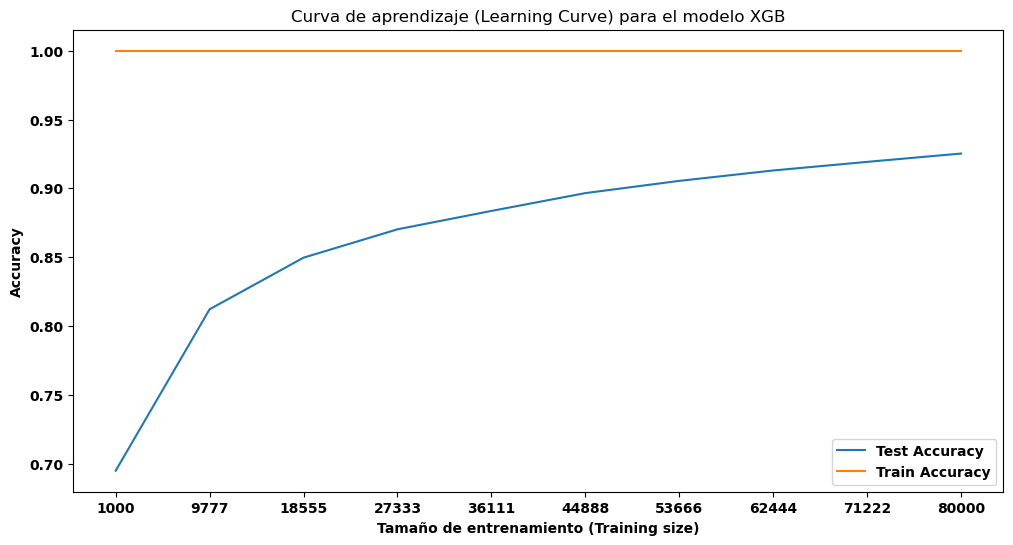

In [52]:
curva_aprendizaje_xgb(modelo_optimo_xgb.n_estimators, modelo_optimo_xgb.max_depth, modelo_optimo_xgb.learning_rate)

> #### Explicación 18.4.3
> El primer modelo de XGB con el que hemos trabajado presenta una gráfica para el subconjunto de test que va **ascendiendo** muy poco a poco, mientras que la gráfica del subconjunto de entrenamiento, **disminuye** segun aumenta el tamaño de dicho entrenamiento. De esa forma, podemos tambien indicar que el el **gap va poco a poco reduciendose** y que, muy seguramente, ambas gráfias **acaben convergiendo**. Considero que esta gráfica tiene un riesgo de **underfitting**, ya que la gráfica del conjunto de test aumenta mientras que la del conjunto de entrenamiento, disminuye. El modelo no esta aprendiendo correctamente de los datos de entrenamiento.
>
> En la gráfica del segundo modelo de XGB se puede observar una gráfica del conjunto de test ascendente a valores de accuracy muy cercanos a **0.95**, parece que tiene una **tendencia ascendente** y el **gap** respecto a train **se va reduciendo**. Muy seguramente, si el tamaño del entrenamiento aumenta, estas **acabarán convergiendo**. Considero que es una gráfica muy buena y que hace ver que el rendimiento del modelo es bastante bueno.

---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales Artificiales**:  

**`18.5.1`** Entrena un modelo tipo ***Multi-layer Perceptron classifier*** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.5.2`** Entrena otro modelo del mismo tipo indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.5.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (_**DNN**-Deep Neural Networks_) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`

**`18.5.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores y explica cuál sería **el mejor modelo que elegirías** para este problema de clasificación multi-clase:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Métricas:
    - Accuracy
    - F1-score `(average='weighted')`
    - Classification report `(zero_division=0)`
- Explica si este modelo o algún otro modelo de todos los puntos realizados en este ejercicio, tiene **el mejor remdimiento en general** para ser elegido como **el clasificador de la cubierta forestal**.

In [53]:
# Solución 18.5.1
from sklearn.neural_network import MLPClassifier

modelo_mlp = MLPClassifier(random_state=100)

modelo_mlp.fit(X_train, y_train)

y_pred_mlp = modelo_mlp.predict(X_test)

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
print("Accuracy: ", accuracy_score(y_test, y_pred_mlp))

Accuracy:  0.7598


In [55]:
print("f1_score:", f1_score(y_test, y_pred_mlp, average="weighted"))

f1_score: 0.7560638103814095


In [56]:
print(classification_report(y_test, y_pred_mlp, zero_division=0))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77      7381
           1       0.81      0.74      0.77      9615
           2       0.74      0.82      0.78      1236
           3       0.80      0.61      0.70       114
           4       0.61      0.20      0.30       349
           5       0.61      0.44      0.52       616
           6       0.84      0.77      0.80       689

    accuracy                           0.76     20000
   macro avg       0.73      0.63      0.66     20000
weighted avg       0.76      0.76      0.76     20000



> #### Explicación 18.5.1
> Conociendo ya métricas de modelos anteriores, podemos dejar claro que este modelo, a pesar de tener una méstricas decentes y que van por buen camino, no se acercan a las métricas del mejor modelo, aunque siguen sin ser las peores.

In [57]:
## Solución 18.5.2
modelo_mlp_2 = MLPClassifier(random_state=100,
                             hidden_layer_sizes=(100,200,100),
                             max_iter=10000,
                             alpha=1e-5,
                             tol=1e-5)

modelo_mlp_2.fit(X_train, y_train)

y_pred_mlp_2 = modelo_mlp_2.predict(X_test)

In [58]:
print("Accuracy: ", accuracy_score(y_test, y_pred_mlp_2))

Accuracy:  0.89125


In [59]:
print("f1_score:", f1_score(y_test, y_pred_mlp_2, average='weighted'))

f1_score: 0.8915821637409428


In [60]:
print(classification_report(y_test, y_pred_mlp_2, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7381
           1       0.92      0.89      0.90      9615
           2       0.87      0.90      0.88      1236
           3       0.82      0.76      0.79       114
           4       0.67      0.83      0.74       349
           5       0.86      0.79      0.82       616
           6       0.96      0.84      0.90       689

    accuracy                           0.89     20000
   macro avg       0.85      0.85      0.85     20000
weighted avg       0.89      0.89      0.89     20000



> #### Explicación 18.5.2
> Este modelo presenta métricas bastate buenas y muy cercanas a 0.9. No son el mejor modelo de la sesión, ya que el mejor modelo superaba dichos valores. Pero no deja de ser un modelo con un **rendimiento bastante bueno**, de **los mejores**.

In [61]:
## Solución 18.5.3
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score
from keras.backend import clear_session

clear_session()

semilla_dnn = 883
random.seed(semilla_dnn)
np.random.seed(semilla_dnn)
tf.random.set_seed(semilla_dnn)

modelo_dnn = Sequential()
modelo_dnn.add(Input(shape=(X_train.shape[1],)))
modelo_dnn.add(Dense(100, activation='relu'))
modelo_dnn.add(Dense(200, activation='relu'))
modelo_dnn.add(Dense(100, activation='relu'))
modelo_dnn.add(Dense(1, activation='sigmoid'))

modelo_dnn.compile(loss='binary_crossentropy', optimizer='Adam')

modelo_dnn.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)

y_pred_dnn = modelo_dnn.predict(X_test)
y_pred_keras = np.where(y_pred_dnn < 0.5, 0, 1)

print('Acuuracy:', accuracy_score(y_test, y_pred_keras))
print('f1_score:', f1_score(y_test, y_pred_keras, average='weighted'))
print(classification_report(y_test, y_pred_keras, zero_division=0))





625/625 [==============================] - 1s 1ms/step
Acuuracy: 0.47985
f1_score: 0.3338459988268489
              precision    recall  f1-score   support

           0       0.48      0.04      0.07      7381
           1       0.48      0.97      0.64      9615
           2       0.00      0.00      0.00      1236
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00       349
           5       0.00      0.00      0.00       616
           6       0.00      0.00      0.00       689

    accuracy                           0.48     20000
   macro avg       0.14      0.14      0.10     20000
weighted avg       0.41      0.48      0.33     20000



> #### Explicación 18.5.3
> Este modelo es uno de los peores modelos de la sesión, con un Accuracy que no llega a 0.5 y un f1 que vagamente se acerca a 0.35. Esto puede deberse a que la **estructura del modelo es muy poco compleja**, lo que provoca un **rendimiento bastante bajo** en comparación.

In [62]:
## Solución 18.5.4
import random
import tensorflow as tf
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score
from keras.backend import clear_session

clear_session()

semilla_dnn_2 = 883
random.seed(semilla_dnn_2)
np.random.seed(semilla_dnn_2)
tf.random.set_seed(semilla_dnn_2)

modelo_dnn_2 = Sequential()
modelo_dnn_2.add(Input(shape=(X_train.shape[1],)))
modelo_dnn_2.add(Dense(50, activation='relu'))
modelo_dnn_2.add(Dense(100, activation='relu'))
modelo_dnn_2.add(Dense(200, activation='relu'))
modelo_dnn_2.add(Dense(1000, activation='relu'))
modelo_dnn_2.add(Dense(200, activation='relu'))
modelo_dnn_2.add(Dense(100, activation='relu'))
modelo_dnn_2.add(Dense(50, activation='relu'))
modelo_dnn_2.add(Dense(1, activation='sigmoid'))

modelo_dnn_2.compile(loss='binary_crossentropy', optimizer='Adam')

modelo_dnn_2.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)

y_pred_dnn_2 = modelo_dnn_2.predict(X_test)
y_pred_keras_2 = np.where(y_pred_dnn_2 < 0.5, 0, 1)

print('Acuuracy:', accuracy_score(y_test, y_pred_keras_2))
print('f1_score:', f1_score(y_test, y_pred_keras_2, average='weighted'))
print(classification_report(y_test, y_pred_keras_2, zero_division=0))

625/625 [==============================] - 1s 2ms/step
Acuuracy: 0.48075
f1_score: 0.3121668917778153
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7381
           1       0.48      1.00      0.65      9615
           2       0.00      0.00      0.00      1236
           3       0.00      0.00      0.00       114
           4       0.00      0.00      0.00       349
           5       0.00      0.00      0.00       616
           6       0.00      0.00      0.00       689

    accuracy                           0.48     20000
   macro avg       0.07      0.14      0.09     20000
weighted avg       0.23      0.48      0.31     20000



> #### Explicación 18.5.4
> Este modelo también presenta unos valores de **f1** y de **accuracy** muy malos, siendo algo mejor (por casi nada) que el modelo anterior. Y sin duda, de los **peores** de la sesión.
>
> Considero que este modelo **no es el mejor** modelo de la esión, ni se encuentra dentro del debate para serlo, para mi el **mejor** modelo fue e que presento valores de 0.92, es decir, el **modelo de XGB** con los hiperparámetros óptimos.